Exploring Parking Spaces in Florence
In this Colab notebook, we utilize the Folium library to visualize parking spaces in Florence using a GeoJSON dataset. Let's break down the steps:

Step 1: Install Folium
First, we ensure that the Folium library is installed, which is a powerful Python wrapper for Leaflet.js, a leading JavaScript library for interactive maps.

!pip install folium

Step 2: Import Libraries
import folium import json

Step 3: Load GeoJSON Data
with open('/content/florence.geojson') as f: parking_data = json.load(f)

Step 4: Create Map
We create an interactive map centered on Florence, providing geographical coordinates and setting the initial zoom level.

m = folium.Map(location=[43.7695604, 11.2558136], zoom_start=14)

Step 5: Add Parking Space Markers
For each feature in the GeoJSON data, we check if it represents a parking space and add markers to the map accordingly.

for feature in parking_data['features']: properties = feature['properties'] coordinates = feature['geometry']['coordinates']

if 'amenity' in properties and properties['amenity'] == 'parking':
    name = properties['name'] if 'name' in properties else 'Parking Space'
    marker = folium.Marker(
        location=[coordinates[1], coordinates[0]],
        popup=name,
        icon=folium.Icon(color='red')
    )
    marker.add_to(m)
Step 6: Display the Map
Finally, we display the map with added parking space markers.

This Colab notebook allows us to visually explore and analyze parking spaces in Florence, providing insights into their locations and amenities.

In [4]:
# Step 1: Install the folium library
!pip install folium

# Step 2: Import the required libraries
import folium
import json

# Step 3: Load the GeoJSON data
with open('/kaggle/input/florence-parking-space/florence.geojson') as f:
    parking_data = json.load(f)

# Step 4: Create a map centered on Florence
m = folium.Map(location=[43.7695604, 11.2558136], zoom_start=14)  # Florence coordinates

# Step 5: Add parking space markers to the map
for feature in parking_data['features']:
    properties = feature['properties']
    coordinates = feature['geometry']['coordinates']

    # Check if the feature represents a parking space
    if 'amenity' in properties and properties['amenity'] == 'parking':
        name = properties['name'] if 'name' in properties else 'Parking Space'

        # Create a marker for the parking space
        marker = folium.Marker(
            location=[coordinates[1], coordinates[0]],
            popup=name,
            icon=folium.Icon(color='red')
        )

        marker.add_to(m)

# Step 6: Display the map
m


Exploring Parking Spaces in Florence usign cluster map

This Colab notebook uses geopandas and folium to This project utilizes geopandas and folium to create an interactive map showcasing parking spaces in Florence, Italy. The map offers a clustered view for a quick glance at the total number of spaces when zoomed out. Zooming in reveals individual parking locations with their respective conditions.

Code Overview:

Install Libraries:

folium for map visualization.
geopandas for handling geospatial data.
Load Data:

Utilize gpd.read_file to load the Florence parking data.
Create Map:

Use folium.Map to set the map's base location and zoom level.
Marker Clusters:

Employ MarkerCluster from folium.plugins to cluster markers for better visualization.
Add Markers:

Iterate through parking data, adding markers with conditions to the cluster.
Display Map:

The interactive map is displayed, allowing exploration of parking spaces.

In [5]:
import geopandas as gpd
import folium
from folium.plugins import MarkerCluster

# Step 1: Load the Florence parking data
try:
    gdf = gpd.read_file("/kaggle/input/florence-parking-space/florence.geojson")
except FileNotFoundError:
    print("File not found. Please provide the correct file path.")

# Step 2: Create a base map
m = folium.Map(location=[43.7696, 11.2558], zoom_start=14)

# Step 3: Create a MarkerCluster layer
marker_cluster = MarkerCluster().add_to(m)

# Step 4: Add parking spaces to the MarkerCluster
for idx, row in gdf.iterrows():
    status = row.get('parking:condition', 'Unknown')
    folium.Marker([row['geometry'].y, row['geometry'].x],
                  popup=f"Condition: {status}",
                  icon=None).add_to(marker_cluster)

# Display the map
m


Parking Space Conditions in Florence - Bar Chart

This code visualizes the distribution of parking space conditions in Florence, Italy, using a bar chart. Follow these steps to understand and analyze the data:

Code Overview:

Install Libraries:

Utilize !pip install folium to install the required folium library.
Import Libraries:

Import folium for map visualization, json for handling GeoJSON data, and matplotlib.pyplot for plotting.
Load GeoJSON Data:

Read the GeoJSON data file (florence.geojson) to extract parking space information.
Extract Parking Space Information:

Iterate through GeoJSON features, identifying parking spaces and extracting conditions.
Analyze and Create Bar Chart:

Create a bar chart displaying the distribution of parking space conditions.

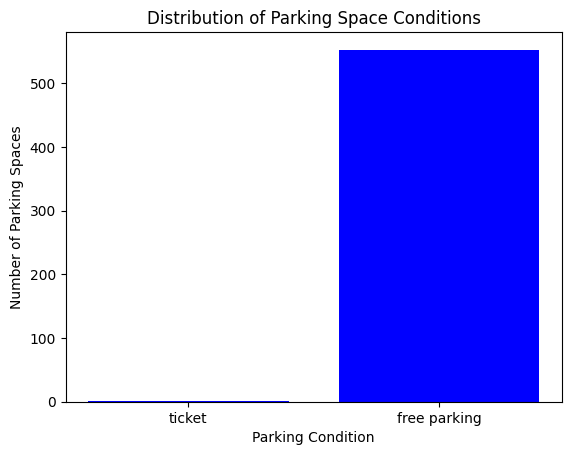

In [8]:
# Step 1: Install the folium library
!pip install folium

# Step 2: Import the required libraries
import folium
import json
import matplotlib.pyplot as plt

# Step 3: Load the GeoJSON data
with open('/kaggle/input/florence-parking-space/florence.geojson') as f:
    parking_data = json.load(f)

# Step 4: Extract parking space information
parking_spaces = []
for feature in parking_data['features']:
    properties = feature['properties']
    coordinates = feature['geometry']['coordinates']

    # Check if the feature represents a parking space
    if 'amenity' in properties and properties['amenity'] == 'parking':
        condition = properties.get('parking:condition', 'free parking')
        parking_spaces.append(condition)

# Step 5: Analyze parking space data and create a bar chart
conditions_count = {condition: parking_spaces.count(condition) for condition in set(parking_spaces)}

# Extract data for the chart
labels = list(conditions_count.keys())
values = list(conditions_count.values())

# Create a bar chart
plt.bar(labels, values, color='blue')
plt.xlabel('Parking Condition')
plt.ylabel('Number of Parking Spaces')
plt.title('Distribution of Parking Space Conditions')
plt.show()


Parking Space Conditions in Florence - Pie Chart

This code analyzes the distribution of parking space conditions in Florence, Italy, using a pie chart. Follow these steps to understand and visualize the data:

Code Overview:

Install Required Libraries:

Utilize !pip install folium and !pip install matplotlib to install necessary libraries.
Import Libraries:

Import folium for map visualization, json for handling GeoJSON data, and matplotlib.pyplot for plotting.
Load GeoJSON Data:

Read the GeoJSON data file (florence.geojson) to extract parking space information.
Extract Parking Space Information:

Iterate through GeoJSON features, identifying parking spaces and extracting conditions.
Analyze and Create Pie Chart:

Create a pie chart displaying the distribution of parking space conditions.

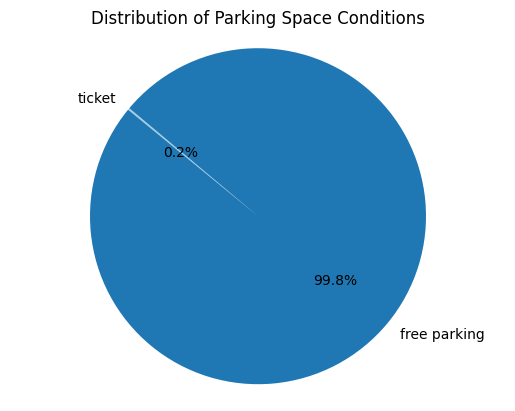

In [9]:
# Step 1: Install the required libraries
!pip install folium
!pip install matplotlib

# Step 2: Import the libraries
import folium
import json
import matplotlib.pyplot as plt

# Step 3: Load the GeoJSON data
with open('/kaggle/input/florence-parking-space/florence.geojson') as f:
    parking_data = json.load(f)

# Step 4: Extract parking space information
parking_spaces = []
for feature in parking_data['features']:
    properties = feature['properties']
    coordinates = feature['geometry']['coordinates']

    # Check if the feature represents a parking space
    if 'amenity' in properties and properties['amenity'] == 'parking':
        condition = properties.get('parking:condition', 'free parking')
        parking_spaces.append(condition)

# Step 5: Analyze parking space data and create a pie chart
conditions_count = {condition: parking_spaces.count(condition) for condition in set(parking_spaces)}

# Extract data for the chart
labels = list(conditions_count.keys())
values = list(conditions_count.values())

# Create a pie chart
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Parking Space Conditions')
plt.show()
